# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd
import numpy as np

# load the training dataset
real_estate = pd.read_csv('data/Real_estate.csv')


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

# Your code to explore data and train a regression model

In [2]:
real_estate.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
real_estate.dtypes

transaction_date            float64
house_age                   float64
transit_distance            float64
local_convenience_stores      int64
latitude                    float64
longitude                   float64
price_per_unit              float64
dtype: object

 # **1. Data exploring**

In [4]:
real_estate.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
transaction_date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
house_age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
transit_distance,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
local_convenience_stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
price_per_unit,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


array([[<AxesSubplot:title={'center':'transaction_date'}>,
        <AxesSubplot:title={'center':'house_age'}>,
        <AxesSubplot:title={'center':'transit_distance'}>],
       [<AxesSubplot:title={'center':'local_convenience_stores'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'price_per_unit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

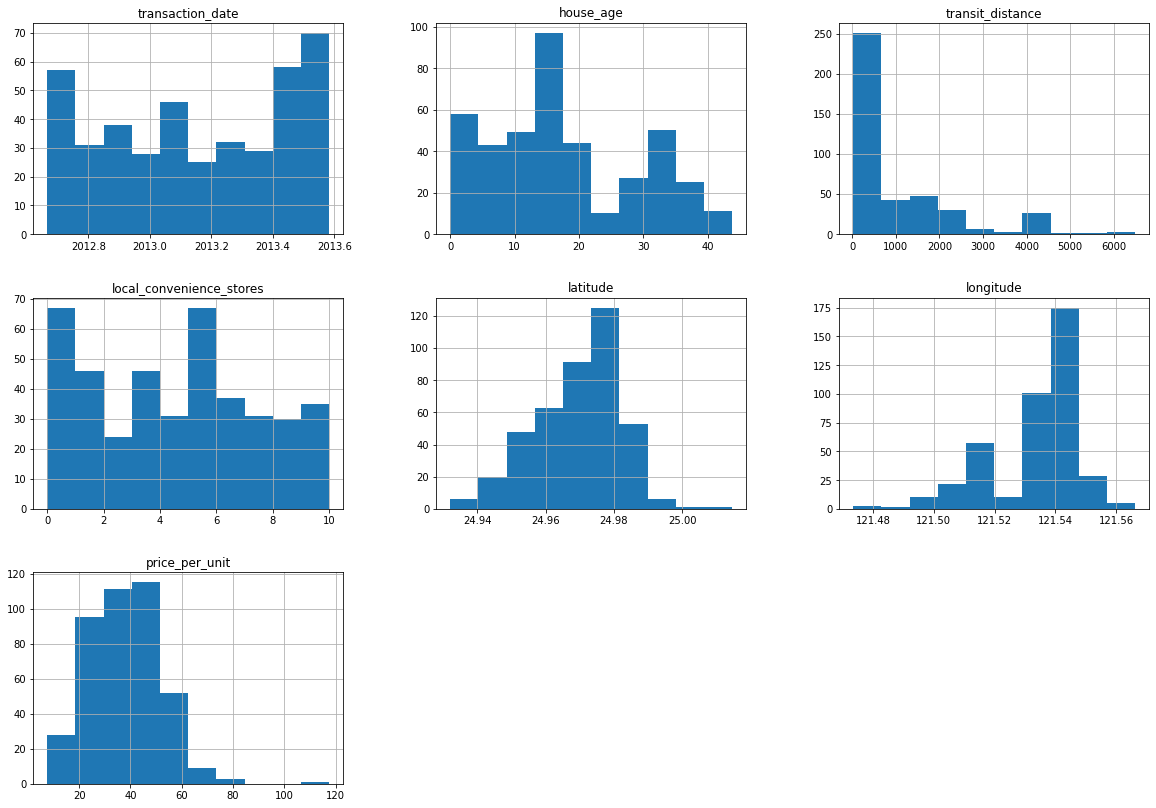

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

real_estate.hist(figsize=(20,14))

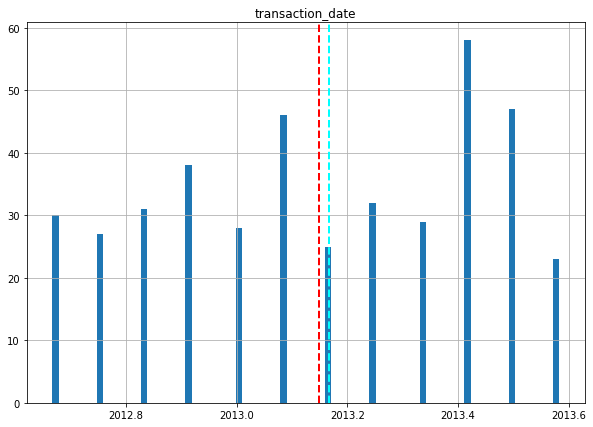

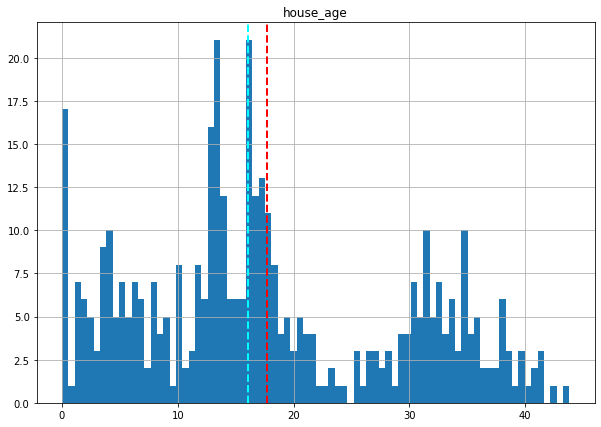

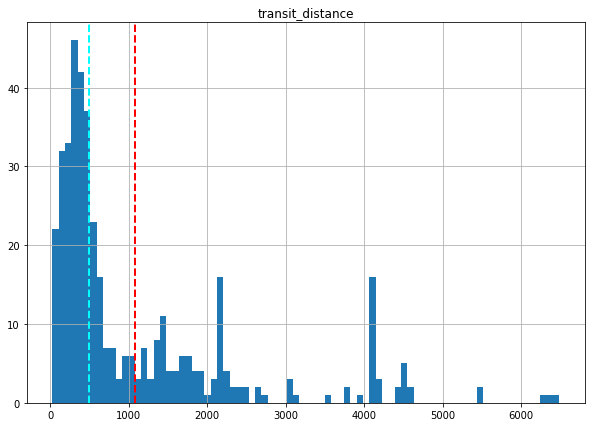

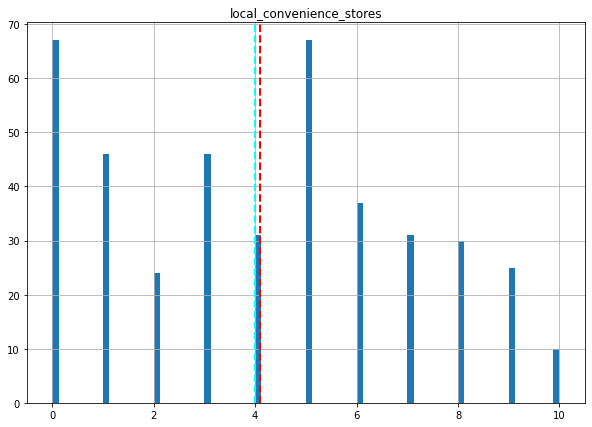

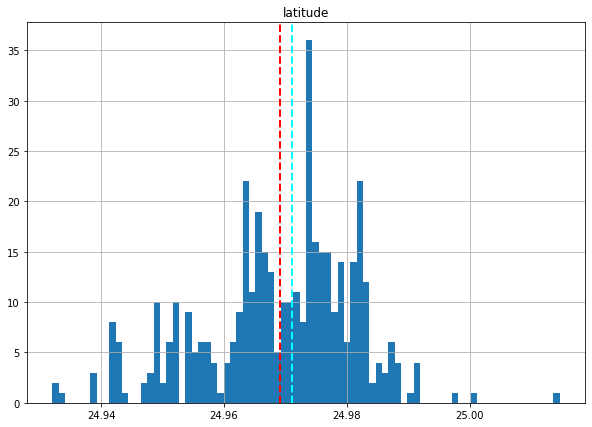

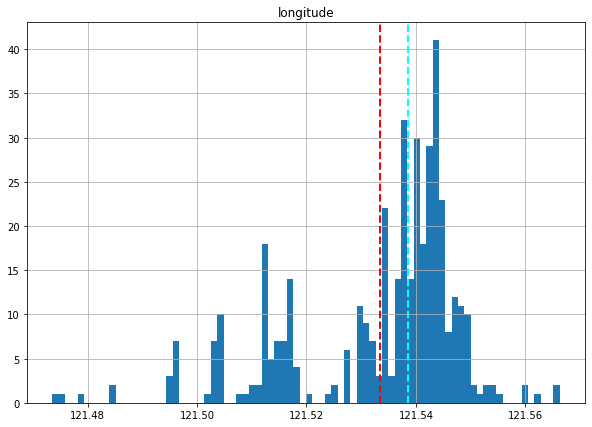

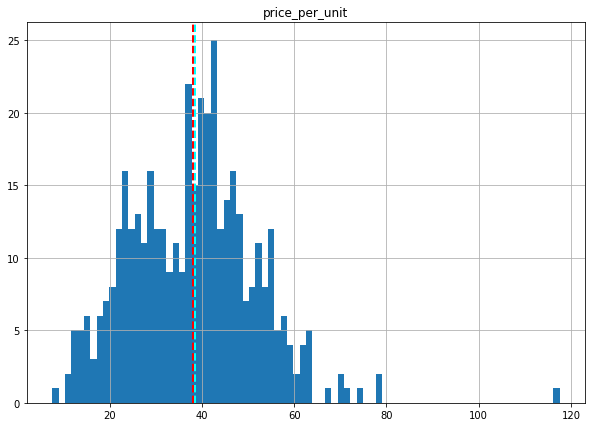

In [6]:
for col in real_estate.columns:
  fig = plt.figure(figsize=(10,7))
  ax = fig.gca()
  feature = real_estate[col]
  feature.hist(bins=80,ax=ax)
  ax.axvline(feature.mean(), color="red",linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(), color="cyan",linestyle='dashed',linewidth=2)
  ax.set_title(col)

### we have some outliers in the label column , we are gone remove only the extreme ones!

In [7]:
real_estate= real_estate.copy()
real_estate= real_estate[real_estate["price_per_unit"] < 80]

In [8]:
real_estate.shape

(413, 7)

# **2. Correlations**

In [9]:
correlation_matrix=real_estate.corr()
correlation_matrix['price_per_unit'].sort_values(ascending=False)

price_per_unit              1.000000
local_convenience_stores    0.612635
latitude                    0.563954
longitude                   0.549250
transaction_date            0.081734
house_age                  -0.210985
transit_distance           -0.694009
Name: price_per_unit, dtype: float64

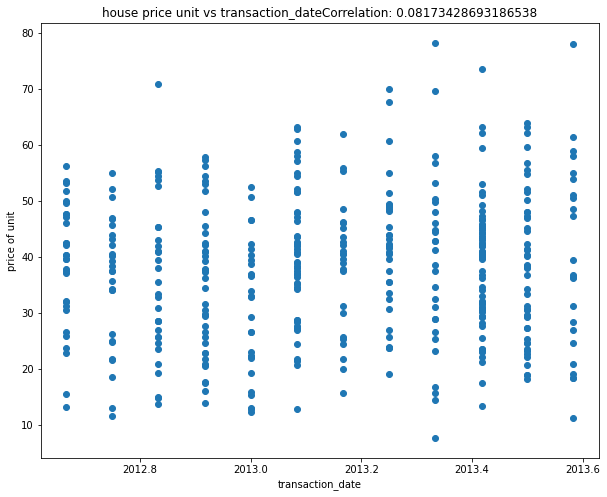

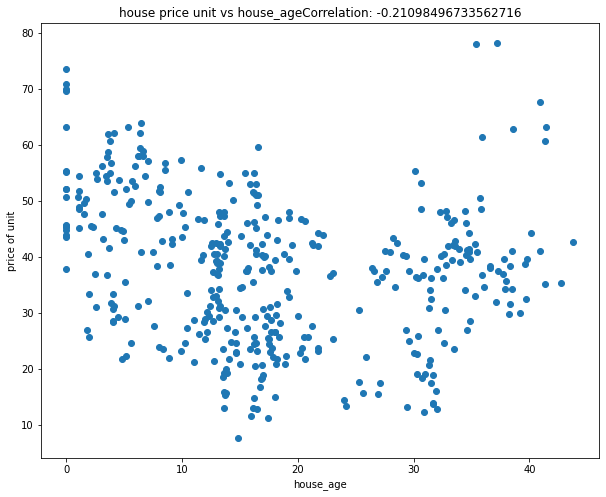

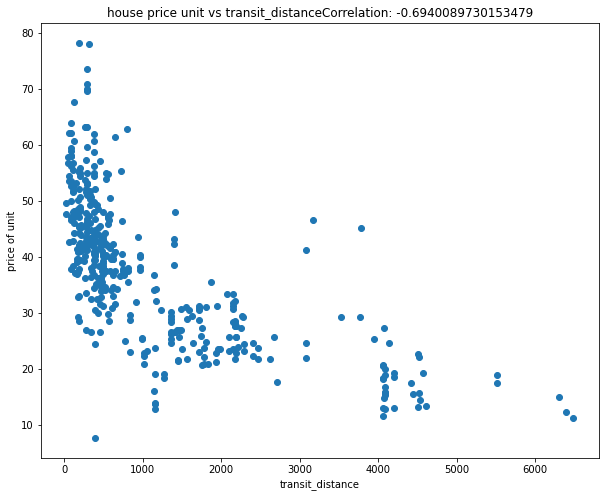

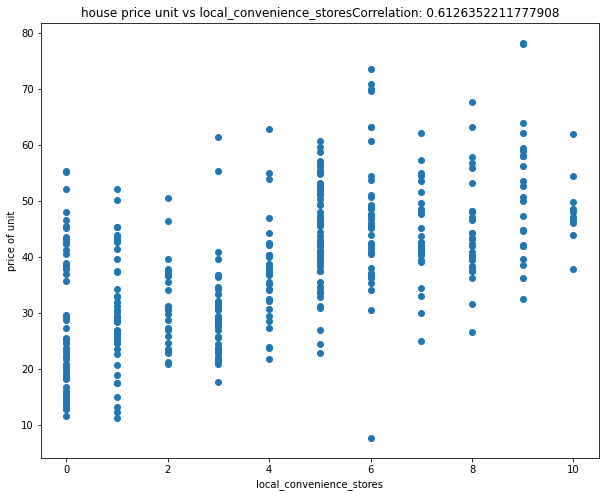

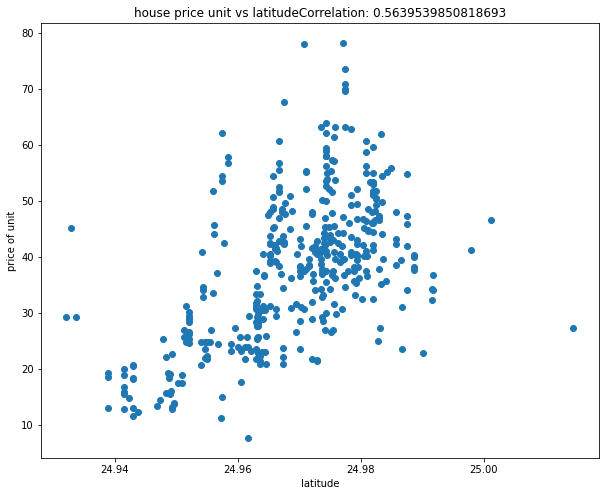

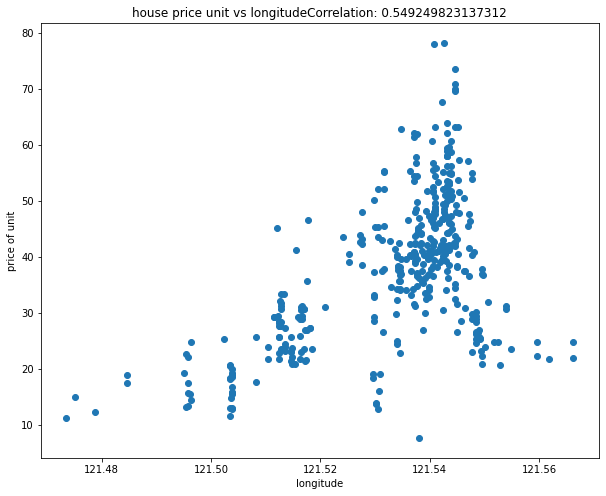

In [10]:
for col in real_estate.columns[:-1]:
  fig = plt.figure(figsize=(10,8))
  ax = fig.gca()
  feature = real_estate[col]
  label = real_estate["price_per_unit"]
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel("price of unit")
  ax.set_title("house price unit vs "+ col + "Correlation: "+str(correlation))

### there is no argueble correlation between our label and transaction date , we decide not to use it !

In [11]:
real_estate.drop("transaction_date",axis=1,inplace=True)

In [12]:
real_estate

,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


# **3. Create training and test set**

In [13]:
from sklearn.model_selection import train_test_split


X, y = real_estate[real_estate.columns[0:-1]].values, real_estate[real_estate.columns[-1]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Training Set: 289, rows
Test Set: 124 rows


# 4. Preprocess the data and train a model in a pipeline

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# numeric_features = [3,4]
# numeric_transformer = Pipeline(steps=[('Std_scaler', StandardScaler())])

# preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('regressor', RandomForestRegressor())])

# model = pipeline.fit(X_train, (y_train))

random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)

RandomForestRegressor()

### in the solution notebook they use StandardScaler on some features....but actually, RandomForestRegressor algorithm does not need scaling 

In [15]:
from sklearn.metrics import mean_squared_error

real_estate_predictions = random_forest.predict(X_test)
forest_rmse = mean_squared_error(y_test,real_estate_predictions,squared=False)
forest_rmse

6.8053803256453245

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [16]:
# Your code to use the trained model
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])
results = random_forest.predict(X_new)
results


array([53.18082857, 15.56746667])